<a href="https://colab.research.google.com/github/bjin2364/mit-deep-learning/blob/main/intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np              # numerical computing library
import matplotlib.pyplot as plt # plotting library

In [ ]:
# create some random data
np.random.seed(0) # set random seed for reproducibility
Ndatapoints = 30
x = np.random.randn(Ndatapoints,1)
y = 2*x + 0.5*np.random.randn(Ndatapoints,1)

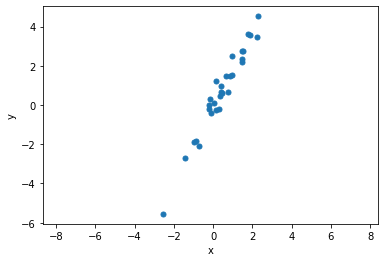

In [ ]:
# plot the data
def my_plot(x,y,w=None):
  plt.plot(x, y, 'o', markersize=5)
  if w is not None:
    plt.plot(x,w*x, color=[0.3,0.3,0.3], linewidth=1)
  plt.axis('equal')
  plt.xlabel('x')
  plt.ylabel('y')

my_plot(x,y)

Mean squared error: 37.62


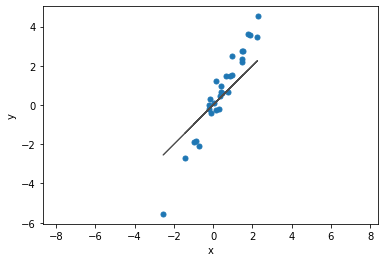

In [ ]:
# now we will try to fit a line to the data, i.e. model y = w*x
# first let's start with a simple guess, w = 1, and check how well it does
def check(x,y,w):
  mse = ((w*x-y)**2).sum()
  return mse

w = 1
my_plot(x,y,w)
print('Mean squared error: {:1.2f}'.format(check(x,y,w)))

Mean squared error: 6.07


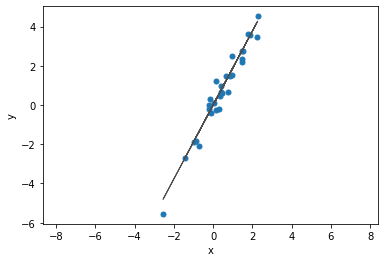

In [ ]:
# let's consider the hypothesis space y = w*x, parameterized by w
# let our objective be to minimize mean squared error (mse)
# we will start with the simplest optimizer possible: guess and check!

def guess():
  w = np.random.randn(1)
  return w

Ntrials = 100
mse_best, w_best = None, None
for i in range(Ntrials):
  w = guess()
  mse = check(x,y,w)
  if mse_best is None or mse < mse_best:
    mse_best = mse
    w_best = w

my_plot(x,y,w_best)
print('Mean squared error: {:1.2f}'.format(check(x,y,w_best)))

# --> to do: try replacing mse with mean absolute error, and see how the result differs; try some other objective functions of your choice

Mean squared error: 6.07


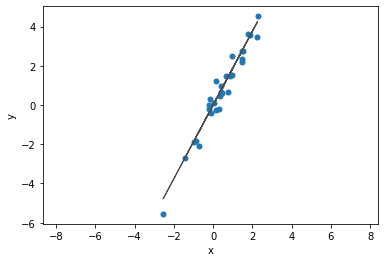

In [ ]:
# Guess and check worked! 
# If you ever feel lost about how to solve a problem, remember that guess and check is always an option and often not a bad one. 
# Better optimization algorithms are essentially exploiting structure in the "check" function, such as the ability to take its gradient.
#
# In the lecture slides, we worked out a closed form solution to the linear least squares problem, w = (X'X)^-1 X'y, which we write in code as:
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.transpose(x)) ,y)

my_plot(x,y,w)
print('Mean squared error: {:1.2f}'.format(check(x,y,w)))